In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from didiUtil import DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710
from predictor import LSTMPredictor, XGBoostPredictor

Using TensorFlow backend.


In [4]:
lstm_predictor = LSTMPredictor()
lstm_predictor.train_month = DIDI201705

In [5]:
train_x, train_y = lstm_predictor.get_train_vec(DIDI201705)
test_x, test_y = lstm_predictor.get_train_vec(DIDI201706)
lstm_predictor.train_model(train_x, train_y)
predict_y = lstm_predictor.model.predict(test_x)

./didi05.csv.lstm.h5


In [6]:
date_index = pd.date_range(start='2017-06-01 13:00:00', periods=707, freq='H')
merge_data = {
    'predict': predict_y.flatten(),
    'real': test_y.flatten()
}
lstm_df = pd.DataFrame(merge_data, index=date_index)

In [7]:
xgb = XGBoostPredictor()

In [8]:
test_x, test_y = xgb.get_train_vec([DIDI201705])

100%|██████████| 1/1 [00:03<00:00,  3.39s/it]


In [9]:
train_x, train_y = xgb.get_train_vec([DIDI201706])

100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


In [10]:
predictor = xgb.train_model(train_x, train_y, [(test_x, test_y)])

[0]	validation_0-rmse:0.268035
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.241524
[2]	validation_0-rmse:0.217861
[3]	validation_0-rmse:0.196601
[4]	validation_0-rmse:0.177768
[5]	validation_0-rmse:0.160895
[6]	validation_0-rmse:0.145788
[7]	validation_0-rmse:0.132353
[8]	validation_0-rmse:0.120488
[9]	validation_0-rmse:0.109942
[10]	validation_0-rmse:0.100782
[11]	validation_0-rmse:0.092628
[12]	validation_0-rmse:0.085523
[13]	validation_0-rmse:0.079331
[14]	validation_0-rmse:0.074076
[15]	validation_0-rmse:0.069509
[16]	validation_0-rmse:0.065814
[17]	validation_0-rmse:0.062543
[18]	validation_0-rmse:0.06
[19]	validation_0-rmse:0.057803
[20]	validation_0-rmse:0.05601
[21]	validation_0-rmse:0.054523
[22]	validation_0-rmse:0.053407
[23]	validation_0-rmse:0.052501
[24]	validation_0-rmse:0.051966
[25]	validation_0-rmse:0.051366
[26]	validation_0-rmse:0.050994
[27]	validation_0-rmse:0.050755
[28]	validation_0-rmse:0.050453
[29]	validation_0-rmse

In [11]:
predict_y = predictor.predict(test_x)

In [12]:
date_index = pd.date_range(start='2017-06-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
xgb_df = pd.DataFrame(merge_data, index=date_index)

In [13]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

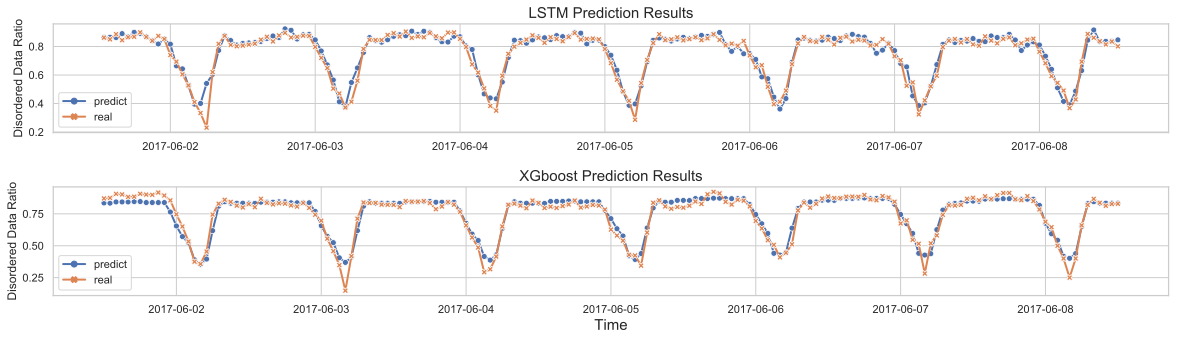

In [16]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(2,1,figsize = (20, 5))
# 设置图名称
ax[0].set_title('LSTM Prediction Results', fontsize=15)
# 设置X轴 Y轴 的label
# ax[0].set_xlabel('Time',fontsize=10)
ax[0].set_ylabel('Disordered Data Ratio',fontsize=12)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=lstm_df[:169],
             ax=ax[0])
ax[1].set_title('XGboost Prediction Results', fontsize=15)
ax[1].set_xlabel('Time',fontsize=15)
ax[1].set_ylabel('Disordered Data Ratio',fontsize=12)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=xgb_df[12:181],
            ax=ax[1])
plt.subplots_adjust(hspace=0.5)
plt.savefig('forcast-didi.pdf',bbox_inches='tight',format='pdf')